<b> This notebook aggregates the results from 100 iterations of random forest. </b>
    
Notebook by YB & RM

Environment (Qiime2 2018.11)

In [ ]:
%matplotlib inline

import numpy as np, pandas as pd, qiime2 as q2, seaborn as sns
import os
from skbio import DistanceMatrix
from scipy.spatial import procrustes
from skbio.stats.ordination import pcoa



Download the results from the N jobs that you run on barnacle.

In [3]:
ls Metabolomics/

1/   15/  21/  28/  34/  40/  47/  53/  6/   66/  72/  79/  85/  91/  98/
10/  16/  22/  29/  35/  41/  48/  54/  60/  67/  73/  8/   86/  92/  99/
100/ 17/  23/  3/   36/  42/  49/  55/  61/  68/  74/  80/  87/  93/
11/  18/  24/  30/  37/  43/  5/   56/  62/  69/  75/  81/  88/  94/
12/  19/  25/  31/  38/  44/  50/  57/  63/  7/   76/  82/  89/  95/
13/  2/   26/  32/  39/  45/  51/  58/  64/  70/  77/  83/  9/   96/
14/  20/  27/  33/  4/   46/  52/  59/  65/  71/  78/  84/  90/  97/


In [45]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('Serum_Proteins', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('Serum_Proteins', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)

Compile the results together from `predictive_accuracy.tsv`. Probably better to put them all in a single dataframe.

In [46]:
collation = []

for i in range(1, 100):
    results_path = os.path.join('Serum_Proteins', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation.append(pd.read_table(results_path))
    
collation = pd.concat(collation)

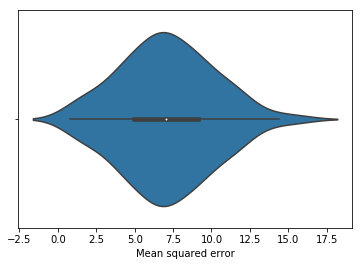

In [47]:
fig = sns.violinplot(data=collation, x='Mean squared error').get_figure()
fig.savefig("SerumProteins_rndmforests_meansqurderror.pdf")

In [48]:
collation['Mean squared error'].describe()

count    99.000000
mean      7.106859
std       3.054861
min       0.816064
25%       4.958853
50%       7.049061
75%       9.128139
max      15.746500
Name: Mean squared error, dtype: float64

# Looking at the feature importances over the 100 runs

In [11]:
x = q2.Artifact.load('random-forests-results/1/feature_importance.qza').view(pd.DataFrame)

In [12]:
x.importance.astype(np.float64).sum()

1.0

In [49]:
importances = []

for i in range(1, 101):
    results_path = os.path.join('Serum_Proteins', str(i), 'feature_importance.qza')
    
    importances.append(q2.Artifact.load(results_path).view(pd.DataFrame).astype(np.float64))
    
importances = pd.concat(importances, axis=1)

In [50]:
original = importances.copy()

In [51]:
importances.fillna(value=0, inplace=True)

In [52]:
sums = importances.sum(axis=1).sort_values(ascending=False)

In [53]:
sums.to_csv('./SerumProteins_rndmforests_featureimportance.csv')